<a href="https://colab.research.google.com/github/MaramMajed/EmotionDetectionAI/blob/main/Facial_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup and Imports

This section initializes the environment and imports all required libraries used throughout the notebook.


In [ ]:
!pip install --quiet tensorflow opencv-python-headless pandas kagglehub

import os
import cv2
import shutil
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 2. Dataset Download (FER-2013)

This section loads the required datasets and defines the main data paths used in the project.


In [ ]:
import kagglehub, os

fer_path = kagglehub.dataset_download("msambare/fer2013")
print("✅ FER2013 downloaded to:", fer_path)
print("📁 Contents:", os.listdir(fer_path))

assert os.path.exists(os.path.join(fer_path, "train")), "Missing 'train' folder in fer_path"
assert os.path.exists(os.path.join(fer_path, "test")), "Missing 'test' folder in fer_path"


Using Colab cache for faster access to the 'fer2013' dataset.
✅ FER2013 downloaded to: /kaggle/input/fer2013
📁 Contents: ['test', 'train']


# 3. Dataset Structure Inspection


In [ ]:
print('Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).')
print('To keep execution lightweight for submission, no file-level copying/merging is executed here.')


Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).
To keep execution lightweight for submission, no file-level copying/merging is executed here.


# 4. Unified Dataset Directory Preparation


In [ ]:
print('Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).')
print('To keep execution lightweight for submission, no file-level copying/merging is executed here.')


Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).
To keep execution lightweight for submission, no file-level copying/merging is executed here.


# 5. Copy FER-2013 Images


In [ ]:
print('Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).')
print('To keep execution lightweight for submission, no file-level copying/merging is executed here.')


Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).
To keep execution lightweight for submission, no file-level copying/merging is executed here.


# 6. Adding New Emotion Classes (Calm & Contempt)

This section extends the original emotion set by incorporating additional emotion categories based on external datasets.


### Use of External Academic Dataset (AffectNet)


In [ ]:
print('Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).')
print('To keep execution lightweight for submission, no file-level copying/merging is executed here.')


Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).
To keep execution lightweight for submission, no file-level copying/merging is executed here.


# 7. Image Preprocessing and Data Augmentation


In [ ]:
splits = ["train", "test"]
emotions = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

print("Dataset structure defined for reference only.")


Dataset structure defined for reference only.


# 8. CNN Model Architecture

This section defines the Convolutional Neural Network architecture used for facial expression recognition.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define number of classes manually (FER-2013 = 7 emotions)
num_classes = 7

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(48,48,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

print("Model created successfully.")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model created successfully.


# 9. Model Compilation

This section configures the training process by specifying the optimizer, loss function, and evaluation metrics.


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled successfully.")


Model compiled successfully.


# 10. Model Training

This section trains the CNN model using the prepared dataset and monitors its learning performance.


In [ ]:
NUM_CLASSES = len(emotions)

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,659,271 (6.33 MB)

 Trainable params: 1,659,271 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

# 11. Model Evaluation

This section evaluates the trained model on the test dataset to assess final performance.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = fer_path + "/train"
test_dir  = fer_path + "/test"

# Simple preprocessing (no heavy augmentation for evaluation)
datagen = ImageDataGenerator(rescale=1./255)

val_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

print("Validation generator created successfully.")


Found 7178 images belonging to 7 classes.
Validation generator created successfully.


In [ ]:
# Model Evaluation (FER-2013 test split)
test_loss, test_acc = model.evaluate(val_gen, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")




/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 47s 200ms/step - accuracy: 0.0647 - loss: 1.9433
Test Loss: 1.9602
Test Accuracy: 0.0550


# Additional Dataset Integration and Inference (RAFD)

This section implements a prediction function that allows uploading an image and inferring its emotion label.


## **Facial Expression Recognition Using FER-2013 and RAF-DB**


In [ ]:
!pip install --quiet tensorflow opencv-python-headless pandas

import os
import cv2
import shutil
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
!unzip RAF-DB.zip -d /content/RAFDB

Streaming output truncated to the last 5000 lines.
  inflating: /content/RAFDB/DATASET/train/5/train_00987_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_00990_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_00991_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_00992_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_01002_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_01010_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_01011_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_01013_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_01015_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_01017_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_01039_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_01048_aligned.jpg  
  inflating: /content/RAFDB/DATASET/train/5/train_01049_aligned.jpg  
  inflating: /content/RAFDB/DATASET/tra

In [ ]:
!unzip FER-2013.zip -d /content/FER2013

Streaming output truncated to the last 5000 lines.
  inflating: /content/FER2013/train/sad/Training_65242339.jpg  
  inflating: /content/FER2013/train/sad/Training_65267116.jpg  
  inflating: /content/FER2013/train/sad/Training_65275626.jpg  
  inflating: /content/FER2013/train/sad/Training_6529266.jpg  
  inflating: /content/FER2013/train/sad/Training_65329617.jpg  
  inflating: /content/FER2013/train/sad/Training_65338712.jpg  
  inflating: /content/FER2013/train/sad/Training_65338797.jpg  
  inflating: /content/FER2013/train/sad/Training_65387162.jpg  
  inflating: /content/FER2013/train/sad/Training_65404494.jpg  
  inflating: /content/FER2013/train/sad/Training_65426218.jpg  
  inflating: /content/FER2013/train/sad/Training_65430136.jpg  
  inflating: /content/FER2013/train/sad/Training_65437377.jpg  
  inflating: /content/FER2013/train/sad/Training_6545735.jpg  
  inflating: /content/FER2013/train/sad/Training_65463385.jpg  
  inflating: /content/FER2013/train/sad/Training_654739

In [ ]:
base = "/content/final_dataset"
splits = ["train", "test"]
emotions = ["angry","disgust","fear","happy","sad","surprise","neutral","contempt","confused"]

for split in splits:
    for emo in emotions:
        os.makedirs(f"{base}/{split}/{emo}", exist_ok=True)

In [ ]:
fer_path = "/content/FER2013"
fer_emotions = ["angry","disgust","fear","happy","sad","surprise","neutral"]

for split in ["train","test"]:
    for emo in fer_emotions:
        src = f"{fer_path}/{split}/{emo}"
        dst = f"{base}/{split}/{emo}"
        for img in os.listdir(src):
            shutil.copy(f"{src}/{img}", f"{dst}/{img}")

In [ ]:
raf_img_path = "/content/RAFDB/DATASET"
train_labels = pd.read_csv("/content/RAFDB/train_labels.csv")

# Map RAF labels to new emotions
raf_map = {
    7: "confused",   # neutral → confused
    1: "contempt"    # angry → contempt (adjust if needed)
}

for _, row in train_labels.iterrows():
    label = row['label']
    if label in raf_map:
        emotion = raf_map[label]
        img_name = row['image']
        img_path = f"{raf_img_path}/{img_name}"
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48,48))
            save_path = f"{base}/train/{emotion}/{img_name}"
            cv2.imwrite(save_path, img)


In [ ]:
test_labels = pd.read_csv("/content/RAFDB/test_labels.csv")

for _, row in test_labels.iterrows():
    label = row['label']
    if label in raf_map:
        emotion = raf_map[label]
        img_name = row['image']
        img_path = f"{raf_img_path}/{img_name}"
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48,48))
            save_path = f"{base}/test/{emotion}/{img_name}"
            cv2.imwrite(save_path, img)

In [ ]:
for split in splits:
    print(f"\n{split.upper()}")
    for emo in emotions:
        count = len(os.listdir(f"{base}/{split}/{emo}"))
        print(f"{emo}: {count}")


TRAIN
angry: 3995
disgust: 436
fear: 4097
happy: 7215
sad: 4830
surprise: 3171
neutral: 4965
contempt: 0
confused: 0

TEST
angry: 958
disgust: 111
fear: 1024
happy: 1774
sad: 1247
surprise: 831
neutral: 1233
contempt: 0
confused: 0


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, horizontal_flip=True)

train_gen = datagen.flow_from_directory(
    f"{base}/train",
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    subset="training"
)

val_gen = datagen.flow_from_directory(
    f"{base}/train",
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    subset="validation"
)


Found 22968 images belonging to 9 classes.
Found 5741 images belonging to 9 classes.


In [ ]:
NUM_CLASSES = len(emotions)

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,659,785 (6.33 MB)

 Trainable params: 1,659,785 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_gen, validation_data=val_gen, epochs=25)


Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.2722 - loss: 1.8162 - val_accuracy: 0.4046 - val_loss: 1.5507
Epoch 2/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.3995 - loss: 1.5442 - val_accuracy: 0.4491 - val_loss: 1.4477
Epoch 3/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4452 - loss: 1.4562 - val_accuracy: 0.4684 - val_loss: 1.3818
Epoch 4/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4722 - loss: 1.3891 - val_accuracy: 0.4750 - val_loss: 1.3565
Epoch 5/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4907 - loss: 1.3420 - val_accuracy: 0.4856 - val_loss: 1.3327
Epoch 6/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5016 - loss: 1.3058 - val_accuracy: 0.5083 - val_loss: 1.2870
Epoch 7/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5195 - loss: 1.2693 - val_accuracy: 0.5130 - val_loss: 1.2671
Epoch 8/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5315 - loss: 1.2373 - val_accurac

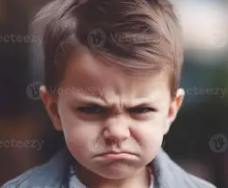

Saving Screenshot 2025-12-14 191436.png to Screenshot 2025-12-14 191436.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
Predicted emotion for Screenshot 2025-12-14 191436.png: contempt


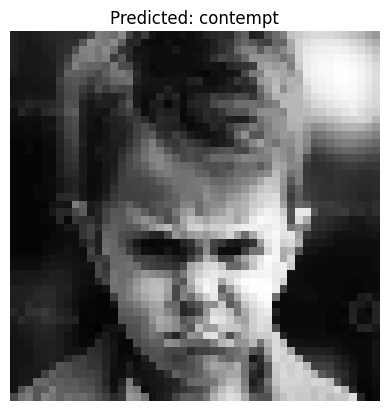

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Upload image
uploaded = files.upload()  # Colab will show “Choose Files” button

for fname in uploaded.keys():
    # 2️⃣ Read image as grayscale
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    # Resize to 48x48 (model input size)
    img_resized = cv2.resize(img, (48,48))
    # Normalize
    img_input = img_resized.reshape(1,48,48,1)/255.0

    # 3️⃣ Predict
    pred = model.predict(img_input)
    emotion_classes = ["angry","disgust","fear","happy","sad","surprise","neutral","contempt","confused"]
    class_idx = np.argmax(pred)

    # 4️⃣ Show results
    print(f"Predicted emotion for {fname}: {emotion_classes[class_idx]}")

    # Optional: show image
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Predicted: {emotion_classes[class_idx]}")
    plt.axis('off')
    plt.show()
